# Data Analysis Nanodegree
## Laila Hussain Alqawain
## Project: Test a Perceptual Phenomenon
### Analyzing the Stroop Effect
#### Background Information
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.


(1) What is the independent variable? What is the dependent variable?

**Let's explain the independent variable and the dependent variable:<br>**
**- An independent variable is a variable that is changed or controlled in a scientific experiment to test the effects on the dependent variable.**(1)<br>
**- A dependent variable is a variable being tested and measured in a scientific experiment.**(1)<br>

**For example, if the experimenter changes the independent variable, the effect on the dependent variable is observed and recorded.**(1)

**From the dataset provided 'stroopdata.csv' I can see:<br>**
**- The independent variable is congruent words and an incongruent words.<br>**
**- The dependent variable is the time it takes to name the ink colors.**

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**After reviewing the dataset, I see there are just 24 rows and this means that the dataset is very small. So, I will find the population of the mean for Congruent words and the population of the mean for Incongruent words. Then, I will calculate the difference between them. That means I use the two-tailed t-test**<br><br>
**My hypothesis will be:**<br>
**- Null Hypothesis is there is no difference between the Congruent words mean and Incongruent words mean in response time.**<br>
**- Alternative Hypothesis is there is a difference between the Congruent words mean and Incongruent words mean in response time.**<br><br>
**H0: Null Hypothesis**<br>
**H1: Alternative Hypothesis**<br>
**μcongruent: The mean of the Congruent population's response times.**<br>
**μincongruent:The mean of the Incongruent population's response times.**<br><br>
**H0: μcongruent − μincongruent = 0**<br>
**H1: μcongruent − μincongruent ≠ 0**<br>






(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [15]:
# import packages
import pandas as pd
import scipy.stats as stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
# read the dataset and stored in df
df = pd.read_csv('stroopdata.csv')
# print few lines from dataset
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


**I will use the describe() method to see the descriptive statistics. So, it will show the measure of central tendency (mean) and the measure of variability (standard deviation and 5 number summaries(min, first quartile, second quartile, third quartile, max)). Then, I will calculate the difference between the means.**

In [17]:
# use the describe method to know the descriptive statistics for the dataset provided.
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


**As we see above:**<br>
**- The mean of Congruent words is = 14.051125**<br>
**- The mean of Incongruent words is = 22.015917**<br>
**- The standard deviation of Congruent words is = 3.559358**<br>
**- The standard deviation of Incongruent words is = 4.797057**<br>
    

In [18]:
# calculate the difference between the mean of Incongruent words and the mean of Congruent words.
diff_mean = 22.015917 - 14.051125
print("The difference in the means of response time between the Incongruent words and the Congruent words is = {}".format(diff_mean))

The difference in the means of response time between the Incongruent words and the Congruent words is = 7.964792000000001


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

#### Insight #1

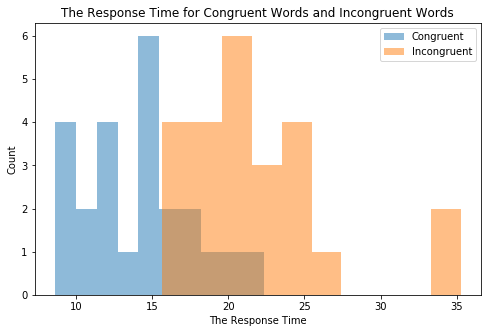

In [19]:
# histograms for The Response Time for Congruent Words and Incongruent Words
plt.figure(figsize=(8, 5))
plt.hist(df['Congruent'], alpha=.5, label='Congruent')
plt.hist(df['Incongruent'], alpha=.5, label='Incongruent')
plt.title('The Response Time for Congruent Words and Incongruent Words')
plt.xlabel('The Response Time')
plt.ylabel('Count')
plt.legend();

**From the histograms above, we can see the response time for Incongruent words and for Congruent words are right_skewed. In addition, the response time for Incongruent words is larger than the response time for the Congruent words.**

#### Insight #2

Text(0,0.5,'Height')

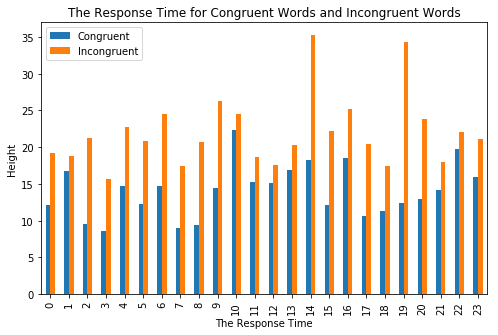

In [20]:
# bar plot for The Response Time for Congruent Words and Incongruent Words
bar_df = df.plot(figsize=(8, 5), title='The Response Time for Congruent Words and Incongruent Words', kind='bar');
bar_df.set_xlabel("The Response Time")
bar_df.set_ylabel("Height")

**From the bar plot above, we can see the response time for Incongruent words is always higher than the Congruent words. As the same what we observed before in insight #1.**

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

**As I informed before, I will use two-tailed t-test. Due to we have a small sample of the dataset and we do not know the variance of two normal distributions. So, the t-test is appropriate for testing between congruent words and incongruent words. In addition, the confidence level is  = 0.05 in a two-tailed test will be used. For each tail will be 0.025. Let's find the p-value and t-statistic and decide the result for the analysis.**<br>


In [21]:
# find the p-value and t-statistic
t, p = stats.ttest_rel(df.Congruent,df.Incongruent)
print('The T-Statistic is =', t)
print('The P-Value is =', p)

The T-Statistic is = -8.02070694411
The P-Value is = 4.10300058571e-08


**As we see above, the t-statistic is very large and the p-value is small. When we compare between the p-value and our confidence level whcih is 0.025, we can see (4.1030e-08 < 0.025) p-value is lower than the confidence level.**<br><br>

**Depending on the result of the analysis and as we see how a large difference between the response time for Incongruent words and Congruent words we decide to Reject The Null Hypothesis and Fail to Reject The Alternative Hypothesis.**

### Conclusion:

**- I defined The independent variable which is congruent words and incongruent words.**<br>
**- I defined The dependent variable is the time it takes to name the ink colors.**<br>
**- I set my hypothesis which is:**<br>
**Null Hypothesis: μcongruent − μincongruent = 0**<br>
**Altranative Hypothesis: μcongruent − μincongruent ≠ 0**<br>
**- I provided two insights which had the same observation. It is the response time for Incongruent words is always higher than the Congruent words**<br>
**- Depending on the dataset provided, I used two tailed t-tests for the analysis.**<br>
**- I found the p-value and t-statistic. Then, I compared between the p-value which is 4.1030e-08 and confidence level which is 0.025. I can  see p-value is lower than the confidence level.**<br>
**- I found there is a large difference between the response time for Incongruent words and Congruent words**<br>
**- So, I decided to Reject The Null Hypothesis and Fail to Reject The Alternative Hypothesis.**<br>

### Resources:

**- (1) https://www.thoughtco.com/independent-and-dependent-variables-differences-606115**<br>
**- https://www.khanacademy.org/math/ap-statistics/tests-significance-ap/idea-significance-tests/v/p-values-and-significance-tests**<br>
**- https://www.khanacademy.org/math/ap-statistics/tests-significance-ap/idea-significance-tests/v/comparing-p-value-diff-significance-levels**<br>